In [141]:
import numpy as np
import tensorflow as tf 
import matplotlib.pylab  as plt 
import pandas as pd 


# NN(Neural Net)

In [13]:
## 예제 
np. random.seed(1234)
xxx = np.linspace(-1, 1, 1000) ## 선 그릴 떄 이용 
xx = np.linspace(-1, 1, 50)
yy_train = xx ** 2 + 0.5 * xx + 1.0 + 0.5 * (2 * np.random.rand(len(xx)) -1 )
yy_test = xx ** 2 + 0.5 * xx + 1.0 + 0.5 * (2 * np.random.rand(len(xx)) -1 )

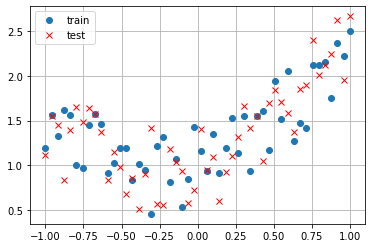

In [20]:
plt.plot(xx, yy_train, 'o', label='train')
plt.plot(xx, yy_test, 'xr', label='test')
plt.grid()
plt.legend()

- 위와 같은 자료가 주어졌다면 
    - 다항회귀(Quadratic Regression Model) 
    
$$
    f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 
$$

    - 선형회귀모형(LInear Regression)
    
$$
    f(x) = \beta_0 \cdot 1 + \beta_1 x 
$$

## Neural Net Model 
- 추정값 : w1
- ver1은 옛날거라 안됨 ㅠ

In [45]:
hidden1_layer= 10
hidden2_layer = 4 

# input layer 
features = tf.constant(np.array([[xval] for xval in xx]), dtype=tf.float32)
labels = yy_train

# hidden layer 1 
w1 =  tf.Variable(tf.zeros([1, hidden1_layer]),  dtype=tf.float32)
b1 = tf.Variable(tf.zeros([hidden1_layer]))

# hidden layer 2 
w2 =  tf.Variable(tf.zeros([hidden1_layer, hidden2_layer]))
b2 = tf.Variable(tf.zeros([hidden2_layer]))

# output layer 
w3 =  tf.Variable(tf.zeros([hidden2_layer,1]))
b3 = tf.Variable(tf.zeros([1]))

# activate function 
hidden1 = tf.nn.sigmoid(tf.matmul(features, w1) + b1 )
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, w2) + b2 )
output = tf.nn.sigmoid(tf.matmul(hidden2, w3) + b3 ) #yhat 

#### tf ver1에서는 케라스(라이브러리)가 분리되어 있는 형태 

In [93]:
#ver.2 

model = tf.keras.models.Sequential([
    #tf.keras.layers.Dense(input_shape=(features.shape)),
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=features.shape), # 출발
    tf.keras.layers.Dense(4, activation='sigmoid'), # 중간 히든 레이어 
    tf.keras.layers.Dense(1) # 끝 아웃
])

In [94]:
# optimizer = tf.keras.optimizers.SGD(0.01)
optimizer = tf.keras.optimizers.Adam()

model.compile(
    loss='mse',
    optimizer = optimizer,
    metrics=['mae', 'mse', 'accuracy'], # 평가
)

In [95]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 50, 10)            20        
_________________________________________________________________
dense_22 (Dense)             (None, 50, 4)             44        
_________________________________________________________________
dense_23 (Dense)             (None, 50, 1)             5         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


## 1.2 모델 훈련

In [135]:
class CustomCallBack(tf.keras.callbacks.Callback):
    
    def plot_model(self, prediction, i):
        plt.plot(xx, yy_train, 'o')
        plt.plot(xx, yy_test, 'xr')
        plt.plot(xxx, prediction, '-r')
        plt.grid()
        plt.title(i)
        plt.show()
        
# 중간 중간 예측이 가능
    
    def on_epoch_end(self, epoch, logs=None):
        if not epoch % 1000: #학습을 n번했을때
            prediction = self.model.predict(xxx.reshape(-1,1))
            prediction = prediction.reshape(-1,1)
            self.plot_model(prediction, epoch)
# 에포크가 끝날때마다 해당함수를 호출해줌 

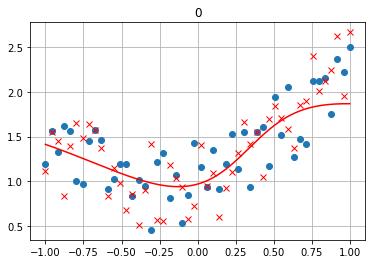

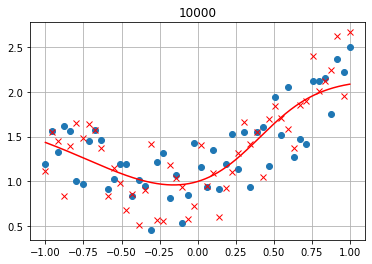

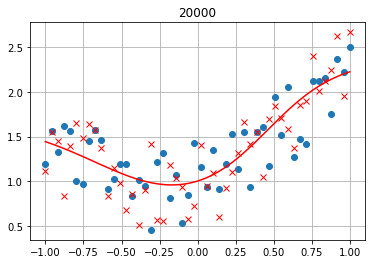

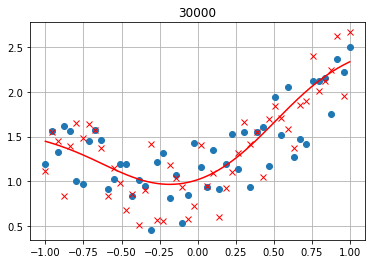

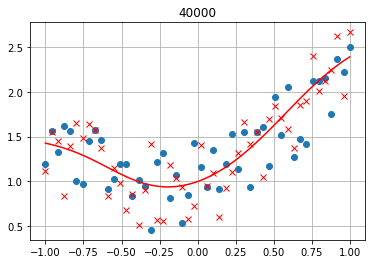

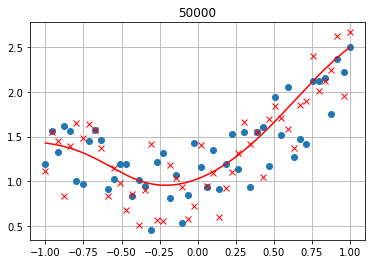

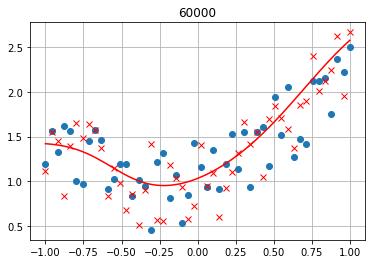

In [136]:
model.fit(features, labels, epochs=60001, validation_split=0.2, verbose=0, callbacks=[CustomCallBack()])

In [137]:
history = model.fit(features, labels, epochs=1000, validation_split=0.2, verbose=0)
history

In [144]:
hist = pd.DataFrame(history.history)

In [145]:
hist['loss']

0      0.062770
1      0.062763
2      0.062762
3      0.062740
4      0.062714
         ...   
995    0.063040
996    0.063290
997    0.063455
998    0.063472
999    0.063376
Name: loss, Length: 1000, dtype: float64

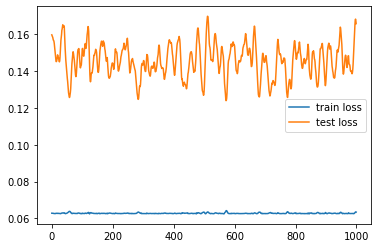

In [148]:
plt.plot(hist['loss'], label='train loss')
plt.plot(hist['val_loss'], label='test loss')
#plt.ylim(0, 3)
plt.legend()

In [ ]:
model.fit(features, labels, epochs=10001, validation_split=0.2, verbose=0, callbacks=[CustomCallBack()])